# DSCI 100 Group Project -- Classifying an E-Mail as Spam or Not Spam 📧

## Developed by Aadi Kanwar, Stella Williams, Satvika Suresha, and Julian Piezas (Group 21)

## Introduction

E-Mails can contain viruses which can harm one's computer system and their identity [(CISA, 2023)]("https://www.cisa.gov/news-events/news/virus-basics"). These "malicious" E-Mails are often categorized as spam, whereas "benevolent" E-Mails are categorized as "not-spam". Our group looks to explore this binary classification of E-Mail through the Spambase Dataset [(UCI ML Repo, 1999)]("https://archive.ics.uci.edu/dataset/94/spambase"). This dataset contains many variables regarding the frequency of strings in the E-Mails, which can be used to classify these E-Mails. Our predictive question therefore becomes: "Can we use some of the features (namely character frequencies and length of sequences of capital letters) provided to us to predict whether a future E-Mail (unknown classification) is spam or not spam?". 

Word Count: 101 Words

## Preliminary Exploratory Data Analysis 

### Reading the dataset into R from the web (this data is raw, next step is cleaning!)

In [5]:
library(tidyverse)  # loading the tidyverse package for reading our data 
url1 <- "https://raw.githubusercontent.com/aadikanwar/DSCI100_group_project/main/spambase.data"  # URL for the raw dataset, taken from the uploaded data set from our GitHub repo
spam_df <- read_csv(url1, col_names = FALSE) #reading the file into the notebook 
head(spam_df)
# this is a representation of the RAW data used for this project, we will clean in the upcoming cell 


Rows: 4601 Columns: 58
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (58): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,1


### Cleaning and Wrangling the Data 

In [7]:
set.seed(200)
## we can pre-select some columns instead of naming all 58 columns, as the column names are described in the dataset location (DOI)
spam_data <- read_csv(url1, col_names = FALSE) |>
    select(49: 55, X58) |>
    rename("char_freq_semicolon" = "X49", "char_freq_paren" = "X50", "char_freq_brack" = "X51", "char_freq_excl" = "X52", "char_freq_mon" = "X53", "char_freq_hash" = "X54", "capital_run_length_average" = "X55", "spam_or_not_spam" = "X58") ## renaming the column names to proper names
    
spam_data <- spam_data |>
    mutate(spam_or_not_spam = as_factor(spam_or_not_spam))

spam_data <- spam_data |>
    mutate(spam_or_not_spam = fct_recode(spam_or_not_spam, "spam" = "1", "not_spam" = "0"))

head(spam_data)
tail(spam_data)


Rows: 4601 Columns: 58
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (58): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


char_freq_semicolon,char_freq_paren,char_freq_brack,char_freq_excl,char_freq_mon,char_freq_hash,capital_run_length_average,spam_or_not_spam
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.000,0,0.778,0.000,0.000,3.756,spam
0.00,0.132,0,0.372,0.180,0.048,5.114,spam
0.01,0.143,0,0.276,0.184,0.010,9.821,spam
0.00,0.137,0,0.137,0.000,0.000,3.537,spam
0.00,0.135,0,0.135,0.000,0.000,3.537,spam
0.00,0.223,0,0.000,0.000,0.000,3.000,spam


char_freq_semicolon,char_freq_paren,char_freq_brack,char_freq_excl,char_freq_mon,char_freq_hash,capital_run_length_average,spam_or_not_spam
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.000,0.000,0,0.000,0,0,1.000,not_spam
0.000,0.232,0,0.000,0,0,1.142,not_spam
0.000,0.000,0,0.353,0,0,1.555,not_spam
0.102,0.718,0,0.000,0,0,1.404,not_spam
0.000,0.057,0,0.000,0,0,1.147,not_spam
0.000,0.000,0,0.125,0,0,1.250,not_spam


The data is clean and wrangled. Each row is a singular observation, each column is a singular variable, and each cell contains a singular value, and so this data is tidy. Names were added to the columns, the class column was converted to a factor and recoded to "spam" or "not_spam" from 1 and 0. 

Word Count: 55 Words

### Creating Summary Tables using Training Data

### Table 1: Determining the Mean of All Predictor Variables, and Count of NAs in Training Data

In [16]:
library(tidymodels) # for training and testing split 
library(dbplyr) # for the rename function 
set.seed(200) # to fix the randomization to one randomization
spam_split <- initial_split(spam_data, prop = 0.6, strata = spam_or_not_spam)  #splitting the data into training and testing data
spam_training <- training(spam_split)
spam_testing <- testing(spam_split)

summary_table_1 <- spam_training |>
    select(-spam_or_not_spam) |>              # computes the averages of variables in data, along with the number of NA's in data
    map_df(mean, na.rm = TRUE) |>
    mutate(num_of_na = sum(is.na(spam_training)))

summary_table_1 <- summary_table_1 |>  # renaming the names in the aforementioned table 
    rename("mean_;_freq" = "char_freq_semicolon", "mean_(_freq" = "char_freq_paren", "mean_[_freq" = "char_freq_brack", "mean_!_freq" = "char_freq_excl", "mean_$_freq" = "char_freq_mon", "mean_#_freq" = "char_freq_hash", "mean_capital_run" = "capital_run_length_average") 

summary_table_1


## it is important to recognize that scaling and centering WILL BE DONE after the proposal and during the actual classification

mean_;_freq,mean_(_freq,mean_[_freq,mean_!_freq,mean_$_freq,mean_#_freq,mean_capital_run,num_of_na
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.04564625,0.1422573,0.01715839,0.288884,0.0764875,0.04550127,4.945219,0


### Table 2: Determining the Dimensions of Rows and Columns in Training Data

In [12]:
summary_table_2 <- tibble(dim(spam_training)) |>  
    rename("dim_of_training_rows_then_cols" = "dim(spam_training)") #dimensions of the training data

summary_table_2

dim_of_training_rows_then_cols
<int>
2759
8


### Table 3: Determining the Dimensions of Rows and Columns in Testing Data

In [13]:
summary_table_3 <- tibble(dim(spam_testing)) |>
    rename("dim_of_testing_rows_then_cols" = "dim(spam_testing)")   #dimensions of the testing data

summary_table_3

dim_of_testing_rows_then_cols
<int>
1842
8


### Table 4: Determining Count of Classes, Along with Percentage of Each Class in Testing Data

In [22]:
number_of_obs <- nrow(spam_testing)

summary_table_4 <- spam_testing |>  ## showing the percentage distribution of the classes spam and not spam
    group_by(spam_or_not_spam) |>   
    summarize(count = n(), percentage = n()/ number_of_obs * 100)

summary_table_4 <- summary_table_4 |>
    rename("classes" = "spam_or_not_spam")
summary_table_4


classes,count,percentage
<fct>,<int>,<dbl>
not_spam,1116,60.58632
spam,726,39.41368


### Table 5: Determining Standard Deviation of Predictors in Training Data

In [15]:
summary_table_5 <- spam_training |>
    select(-spam_or_not_spam) |>
    map_df(sd, na.rm = TRUE) 

summary_table_5 <- summary_table_5 |>
    rename("sd_;_freq" = "char_freq_semicolon", "sd_(_freq" = "char_freq_paren", "sd_[_freq" = "char_freq_brack", "sd_!_freq" = "char_freq_excl", "sd_$_freq" = "char_freq_mon", "sd_#_freq" = "char_freq_hash", "sd_capital_run" = "capital_run_length_average")

summary_table_5

sd_;_freq,sd_(_freq,sd_[_freq,sd_!_freq,sd_$_freq,sd_#_freq,sd_capital_run
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2940466,0.2820605,0.1148197,0.9660054,0.2401114,0.4367491,25.12168


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8822037
kap,binary,0.7489946


          Truth
Prediction not_spam spam
  not_spam     1563  216
  spam          109  871

.pred_class
<fct>
spam


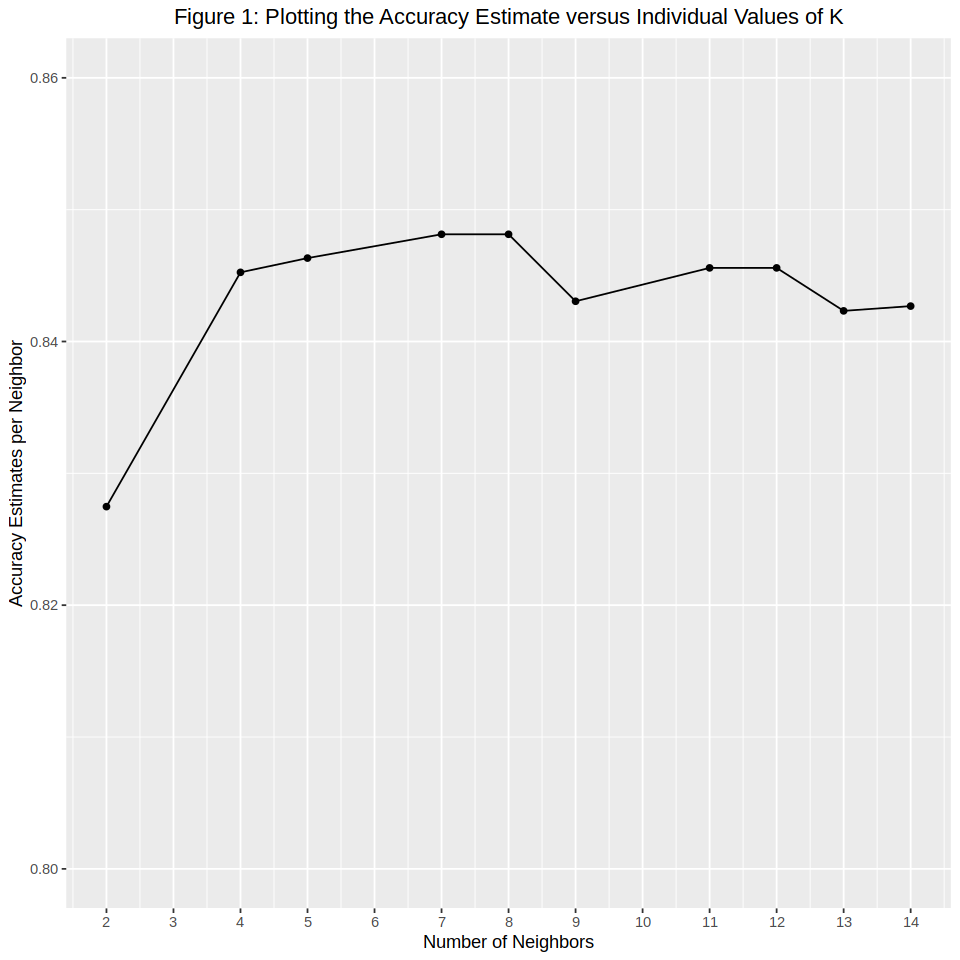

In [24]:
set.seed(4321)
library(tidymodels)
install.packages("kknn")
# spam_training

spam_vfold <- vfold_cv(spam_training, v = 5, strata = spam_or_not_spam)

spam_recipe <- recipe(spam_or_not_spam ~., data = spam_training) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

knn_tune <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification") 

knn_results <- workflow() |>
    add_recipe(spam_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = spam_vfold, grid = 10) |>
    collect_metrics()

accuracies <- knn_results |>
    filter(.metric == 'accuracy')

# accuracies

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = 'Number of Neighbors', y = 'Accuracy Estimates per Neighbor') +
    scale_x_continuous(breaks = seq(0, 14, by = 1)) +
    scale_y_continuous(limits = c(0.8, 0.86)) +
    ggtitle("Figure 1: Plotting the Accuracy Estimate versus Individual Values of K") +
    theme(plot.title = element_text(hjust = 0.5))

accuracy_vs_k

knn_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = 7) |>
    set_engine("kknn") |>
    set_mode("classification") 

spam_fit <- workflow() |>
    add_recipe(spam_recipe) |>
    add_model(knn_spec) |>
    fit(data = spam_training)

spam_test_predictions <- predict(spam_fit, spam_training) |>
    bind_cols(spam_training)

spam_prediction_accuracy <- spam_test_predictions |>
    metrics(truth = spam_or_not_spam, estimate = .pred_class)

spam_prediction_accuracy

spam_matrix <- spam_test_predictions |>
    conf_mat(truth = spam_or_not_spam, estimate = .pred_class)

spam_matrix

new_spam <- tibble(char_freq_semicolon = c(0.001), char_freq_paren = c(0.001), char_freq_brack = c(0.001), 
                  char_freq_excl = c(1), char_freq_mon = c(0.001), char_freq_hash = c(0.001), capital_run_length_average = c(20))

new_pred <- predict(spam_fit, new_spam)
new_pred

## Methods in Conducting Our Analysis 

### Creating Important Plots Comparing Distributions of Predictors and Varying Incomes, via the Training Data

Warning message:
“Removed 130 rows containing missing values (`geom_point()`).”


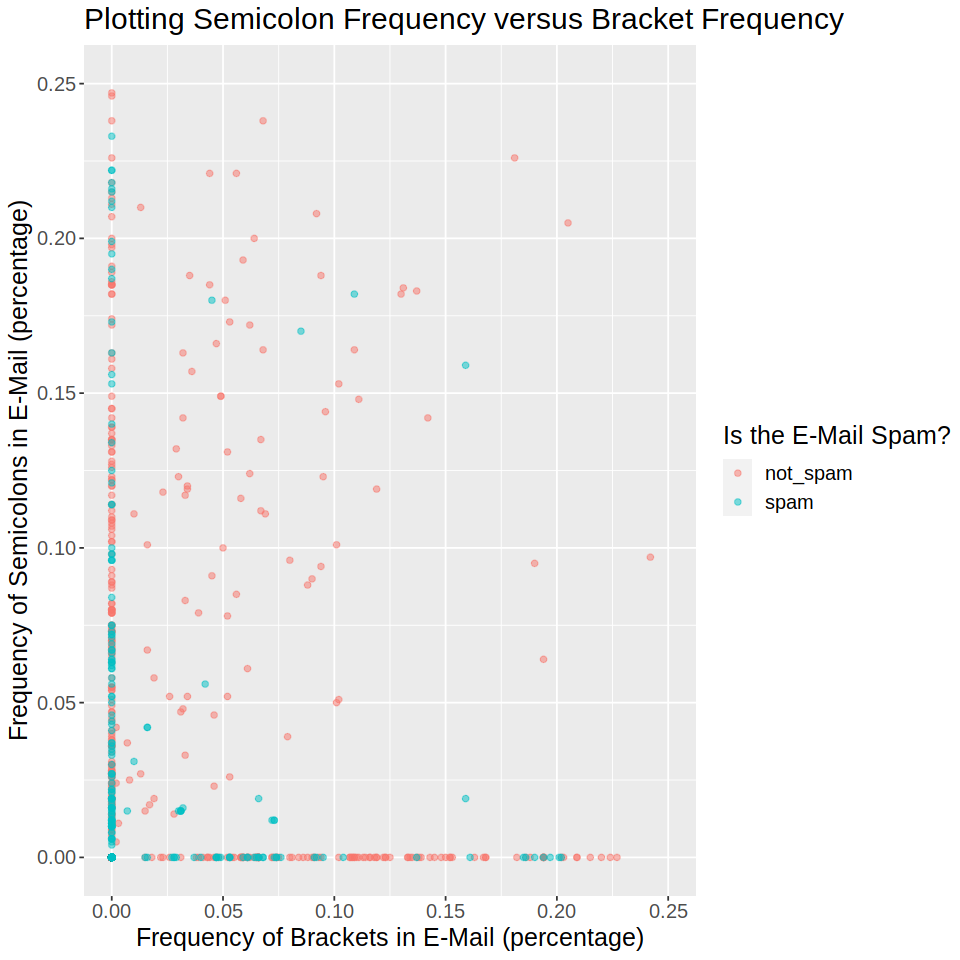

In [23]:
library(repr) # for setting the height and width of the plots 

options(repr.plot.width = 8, repr.plot.height = 8)

spam_plot1 <- spam_training |>
    ggplot(aes(x = char_freq_brack, y = char_freq_semicolon, colour = spam_or_not_spam)) +
    geom_point(alpha = 0.5) +
    labs(x = "Frequency of Brackets in E-Mail (percentage)", y = "Frequency of Semicolons in E-Mail (percentage)", colour = "Is the E-Mail Spam?") +
    xlim(c(0, 0.25)) +
    ylim(c(0, 0.25)) +
    theme(text = element_text(size = 15)) +
    ggtitle("Plotting Semicolon Frequency versus Bracket Frequency")

spam_plot1
## OTHER GRAPHS CAN BE PLOTTED AS SUCH, BUT FOR SIMPLICITY, JUST THIS GRAPH IS PLOTTED FOR THE PROPOSAL

## The graphs tells us the relationship between two of the predictor variables, and is coloured by class of spam or not spam
## the importance of this graph lies in the fact that as the frequency of brackets and semicolons goes up, it is more likely for the e-mail to be spam
## this can lead to interesting conclusions as one may suspect the opposite case (excsessive brackets and semicolons leading to spam e-mail)

### How will we conduct our analysis? What variables will we consider?

We will conduct our analysis via KNN classification, as we are considering a binary classification of "spam" or "not spam" E-Mails, which are categorical classifications. We will consider the result of our model through accuracy, and also precision/recall, to determine how our model treated positives and negatives. The raw dataset contained 58 features, but for the purpose of this project we consider 7: frequency of characters such as hard and soft brackets, semicolons, money symbols, exclamation points, and hash signs (**all as percentages**), as well as the average length of uninterrupted capital letters (i.e "AAABSsdA") has a length of 5 uninterrupted capitals. To choose these we took into account articles such as [(Forbes, 2010)]("https://www.forbes.com/sites/firewall/2010/03/17/the-most-common-words-in-spam-email/?sh=5f23e8df7d80"), which consider words that are most frequent in spam e-mails. These words often contain the aforementioned symbols (brackets, exclamations, etc.), and so we believed that it would make for a good classification to use these as our predictors.

Word Count: 152 Words

### How will we visualize our results?

We will visualize our results via multiple plots as shown above, considering all of the different features and colored by the class of "spam" or "not_spam". We can then create background fields of the colours of spam or not spam, to indicate how much of the graph would have been classified as spam and how much would have been classified as not spam, considering an arbitrary unknown observation. For our accuracy we will look to plot the K values versus our accuracy to see which K yields the best accuracy. 

Word Count: 90 Words 

## Expected Outcomes and Significance

### What do we expect to find?

We expect that E-Mails with high frequency of the listed characters and long sequences of uninterrupted capitals will be classified as spam E-Mails, and low frequency and sequences will be classified as "not spam". 

Word Count: 34 Words

### What impact could such findings have?

The findings in this project could aid data scientists to change their pre-existing classifiers for spam E-Mails, as there may be some results that do not align with their hypothesis'.

Word Count: 30 Words

### What future questions could this lead to?

This project could lead to questions about how E-Mails should/should not be classified as spam; if high frequency characters do **not** lead to spam E-Mail, then data scientists may focus on low frequency characters, and vice versa. 

Word Count: 38 Words

### Total Word Count: 500 Words 

 ## Works Cited

- [UCI Machine Learning Repo, Spambase Dataset, 1999]("https://archive.ics.uci.edu/dataset/94/spambase")
- [Forbes Article on Frequent Words in Spam Emails, 2010]("https://www.forbes.com/sites/firewall/2010/03/17/the-most-common-words-in-spam-email/?sh=5f23e8df7d80")
- [Virus Basics from CISA, 2023]("https://www.cisa.gov/news-events/news/virus-basics")